# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [ ]:
import csv
import sys
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

plt.style.use('default')
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_name):
   with open(file_name) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) # reading the first row
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

# all the three datasets contain data points on (x,y) 
file_name1="/content/drive/MyDrive/Colab Notebooks/3-clusters.csv"
file_name2="/content/drive/MyDrive/Colab Notebooks/dataset-DBSCAN.csv"     
file_name3="/content/drive/MyDrive/Colab Notebooks/CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

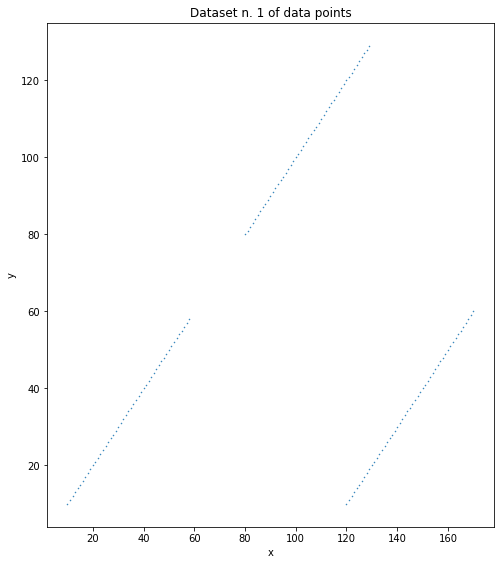

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

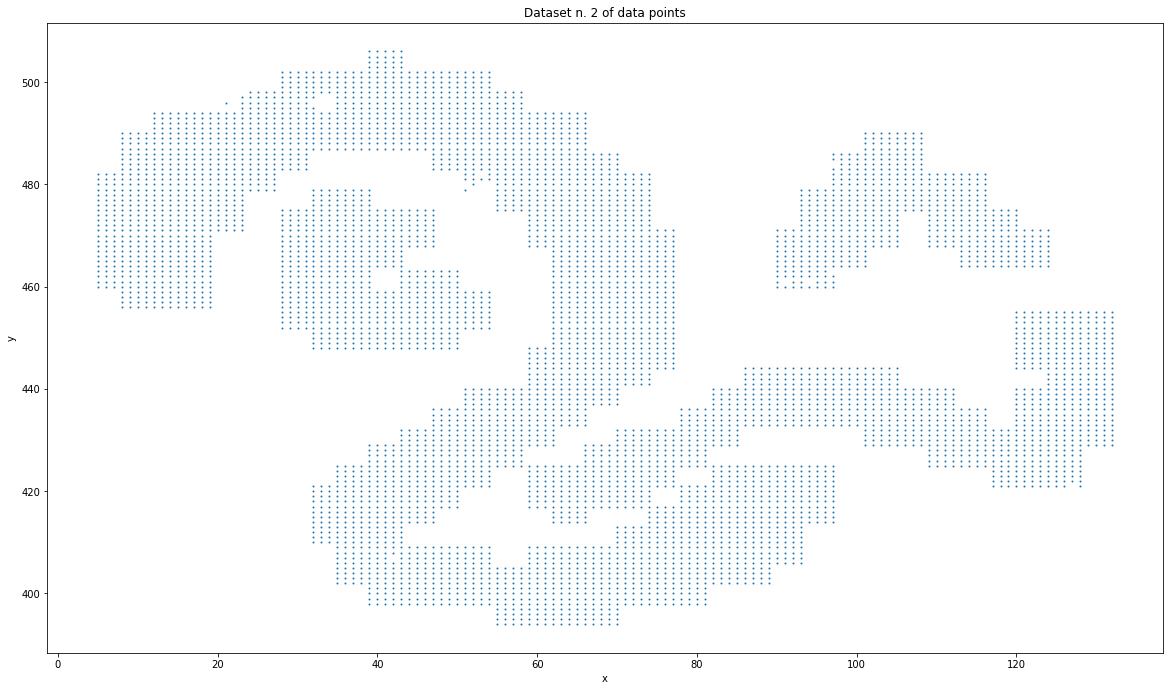

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

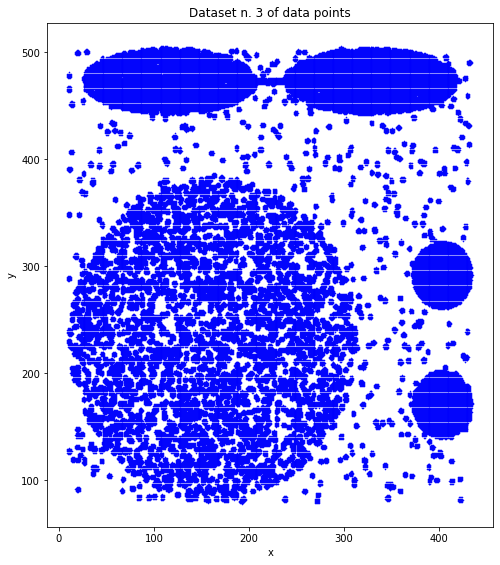

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(data, clf, n_samples, title):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    
    ax.set_title('Clusterized dataset ' + title) 
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color=['b','g','r','c','m','y','k','w']
    
    #plot the dataset
    k = len(np.unique(clf.labels_))
    for clu in range(k):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i,0] for i in range(n_samples) if clf.labels_[i]==clu]
        data_list_y = [data[i,1] for i in range(n_samples) if clf.labels_[i]==clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=1)
    plt.show()

In [ ]:
import csv
import sys
from os.path import join

import numpy as np
 
# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

data1,feature_names1,n_samples1,n_features1 = load_data(file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

n_samples=
150
Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster

In the following program we plot the clusters

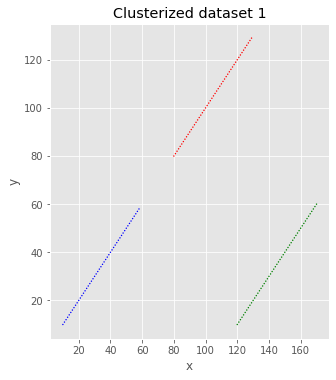

In [ ]:

plot_clusters(data1, kmeans1, n_samples1, "1")

In the following cell I propose you to perform clustering with K-means on dataset2.

In [ ]:

data2,feature_names2,n_samples2,n_features2 = load_data(file_name2)

k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

i=0
for i in range(n_samples2):
    print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+")")
    print("in cluster n."+str(kmeans2.labels_[i]))


Output streaming troncato alle ultime 5000 righe.
Example n.3618=(70.0,464.0)
in cluster n.0
Example n.3619=(70.0,463.0)
in cluster n.0
Example n.3620=(70.0,462.0)
in cluster n.0
Example n.3621=(70.0,461.0)
in cluster n.0
Example n.3622=(70.0,460.0)
in cluster n.0
Example n.3623=(70.0,459.0)
in cluster n.0
Example n.3624=(70.0,458.0)
in cluster n.0
Example n.3625=(70.0,457.0)
in cluster n.0
Example n.3626=(70.0,456.0)
in cluster n.1
Example n.3627=(70.0,455.0)
in cluster n.1
Example n.3628=(70.0,454.0)
in cluster n.1
Example n.3629=(70.0,453.0)
in cluster n.1
Example n.3630=(70.0,452.0)
in cluster n.1
Example n.3631=(70.0,451.0)
in cluster n.1
Example n.3632=(70.0,450.0)
in cluster n.1
Example n.3633=(70.0,449.0)
in cluster n.1
Example n.3634=(70.0,448.0)
in cluster n.1
Example n.3635=(70.0,447.0)
in cluster n.1
Example n.3636=(70.0,446.0)
in cluster n.1
Example n.3637=(70.0,445.0)
in cluster n.1
Example n.3638=(70.0,444.0)
in cluster n.1
Example n.3639=(70.0,443.0)
in cluster n.1
Exam

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

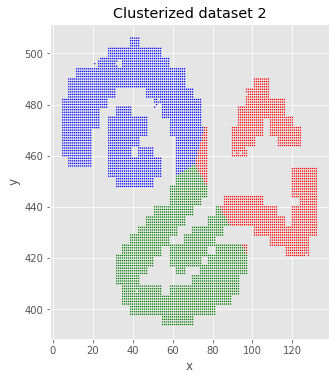

In [ ]:

plot_clusters(data2, kmeans2, n_samples2, "2")

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [ ]:
data3,feature_names3,nsamples3,n_features3 = load_data(file_name3)

k=6
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)



n_samples=
86558


In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

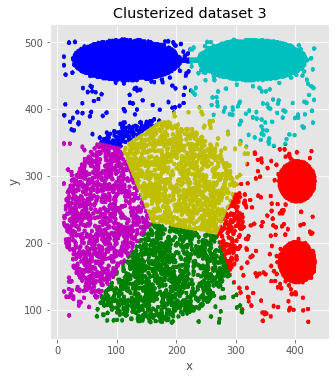

In [ ]:

plot_clusters(data3, kmeans3, n_samples3, "3")

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.


In [ ]:
# Il coefficiente di silhouette può essere un ottima metrica. 
# Contrasta la distanza media dagli elementi nello stesso cluster con la distanza 
# media dagli elementi in altri cluster. Gli oggetti con un valore di sagoma elevato sono considerati ben 
# raggruppati, gli oggetti con un valore basso possono essere anomali. Questo indice funziona bene con il
# clustering k-mean e viene anche utilizzato per determinare il numero ottimale di cluster.

import math
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

def sse(X, Y):
    return np.linalg.norm(X - Y)**2 # equivalente alla distanza di minkowski

def wss(clusters, means):
    wss_sum = 0
    for i in range(len(means)): # per ogni cluster i
        for example in clusters[i]: #per ogni esempio nel i-esimo cluster
            wss_sum += sse(example, means[i]) #calcola la sse = distanza distanza tra punto x del cluster i e centroide del cluster i-esimo
    return wss_sum

def kmeans_evaluation(data, k, iterations):
    best_wss = math.inf
    for n in range(iterations):
        kmeans = KMeans(n_clusters=k, random_state=n).fit(data)
        means = kmeans.cluster_centers_
        clusters = [[] for _ in range(k)]
        for i in range(len(data)):
            clusters[kmeans.labels_ [i]].append(data[i])
        best_wss = min(best_wss, wss(clusters, means))
    return best_wss

def kmeans_silhouette_scores(data, max_k, plot_title):
    silhouettes = []
    min_clusters = 2
    clusters_range = range(min_clusters, max_k)

    for k in clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        silhouettes.append(metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))

    kForSil = np.argmax(silhouettes) + min_clusters
    print("Best k for silhouette: ", kForSil)
 #   kmeans = KMeans(n_clusters=kForSil, random_state=0).fit(data)
 #   visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
 #   visualizer.fit(data)        # Fit the data to the visualizer
 #   visualizer.show()        # Finalize and render the figure

    

    
    kmeans_evaluation_silhouette(data,list(range(2,max_k)))


    plt.plot(clusters_range,silhouettes)
    plt.ylabel('score')
    plt.xlabel('n. of clusters')
    plt.title("Silhouettes scores for dataset " + plot_title)
    plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:


print("data1 evaluation:", kmeans_evaluation(data1, 3, 10))
print("data2 evaluation:", kmeans_evaluation(data2, 4, 10))
print("data3 evaluation:", kmeans_evaluation(data3, 3, 5))

#Domanda 4:
# la soluzione migliore per la clusterizzazione è quella per il primo dataset. Infatti non solo è visibilmente
# classificabile in 3 cluster ma effettivamente ottiene uno score di silhouette avarege migliore. Circa 0,72, contro
# gli 0,47 del secondo e i soli 0,39 del terzo.

data1 evaluation: 62524.99999999999
data2 evaluation: 2586237.0437564515
data3 evaluation: 916138241.7091415


As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from google.colab import files
import matplotlib.cm as cm

colors = ['b','g','r','c','m','y','k','brown','#0000FF', '#191970', '#FAFAD2', '#2E8B57', '#B0C4DE', '#4169E1', '#8B008B']
np.random.seed(5)

def kmeans_evaluation_silhouette(data, k_list):
    for k in k_list:
        fig, (ax1, ax2) = plt.subplots(1, 2) #1 riga e due colonne
        fig.set_size_inches(12, 7)
        ax1.set_xlim([-0.5, 1]) #la silhouette varia tra [-1, 1]
        ax1.set_ylim([0, len(data) + (k + 1) * 10])

        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(data)
    
        silhouette_avg = silhouette_score(data, cluster_labels) #media silhouette 
        silhouette_values = silhouette_samples(data, cluster_labels) #valore silhouette per ogni esempio

        y_lower = 10
        for i in range(k): #per ogni cluster 
            i_cluster_silhouette_values = \
              silhouette_values[cluster_labels == i]
            i_cluster_silhouette_values.sort()

            i_cluster_size = i_cluster_silhouette_values.shape[0]
            y_upper = y_lower + i_cluster_size
            color = colors[i]
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, i_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * i_cluster_size, str(i))
            y_lower = y_upper + 10

        ax1.set_xlabel("Silhouette coefficient")
        ax1.set_ylabel("Cluster")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        colors_ax2 = cm.nipy_spectral(cluster_labels.astype(float) / k)
        ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors_ax2, edgecolor='k')
        
        centroidi = kmeans.cluster_centers_
        ax2.scatter(centroidi[:, 0], centroidi[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centroidi):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

        plt.suptitle(("k = %d, avg_silhouette = %f" % (k, silhouette_avg)), fontsize=14, fontweight='bold')

Data1

[540169.52, 225889.10891089108, 62524.99999999999, 45949.999999999985, 30325.0, 15624.999999999996, 12547.999999999998, 9660.0, 6936.0]


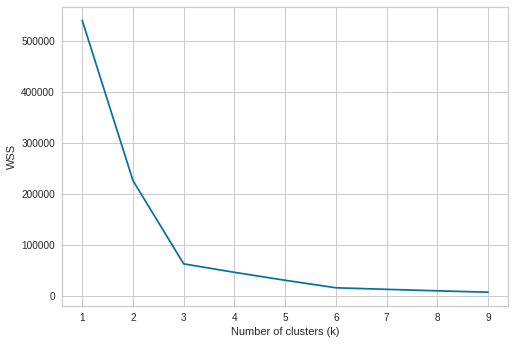

Best k for silhouette:  3


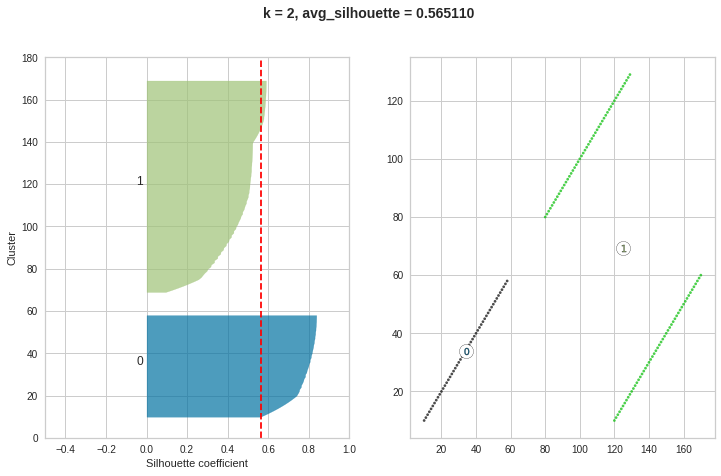

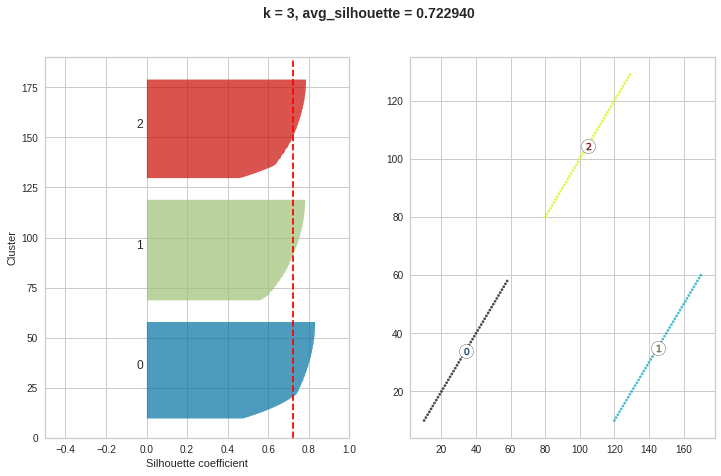

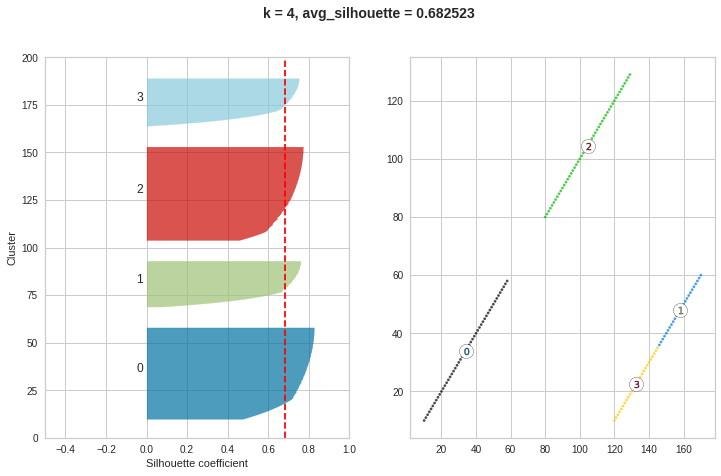

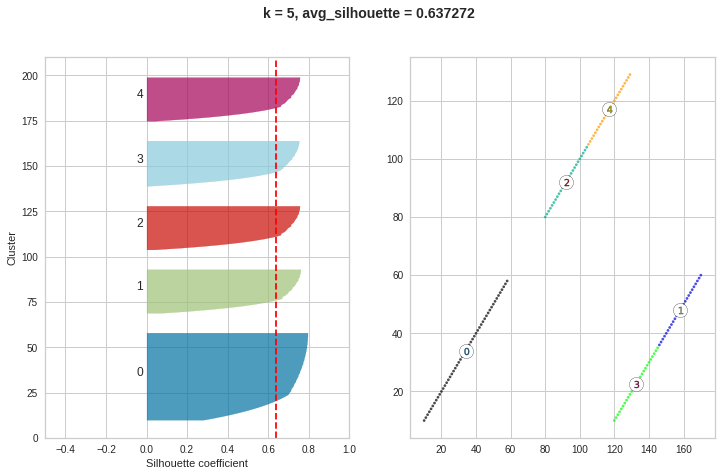

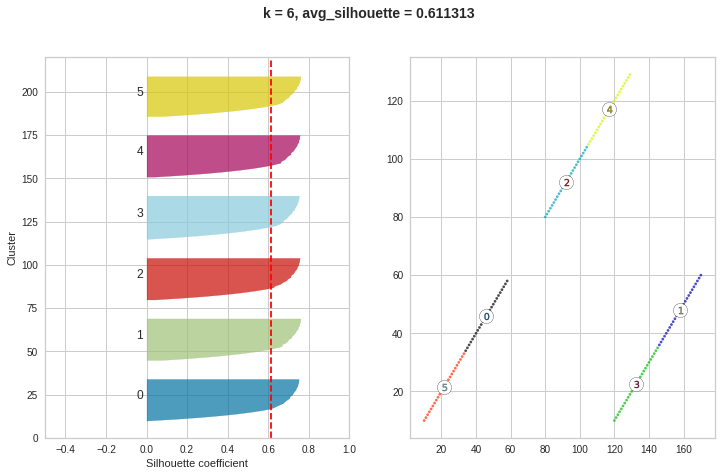

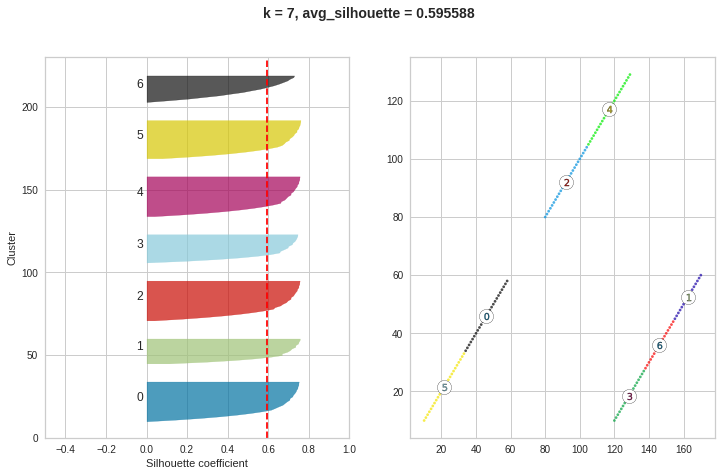

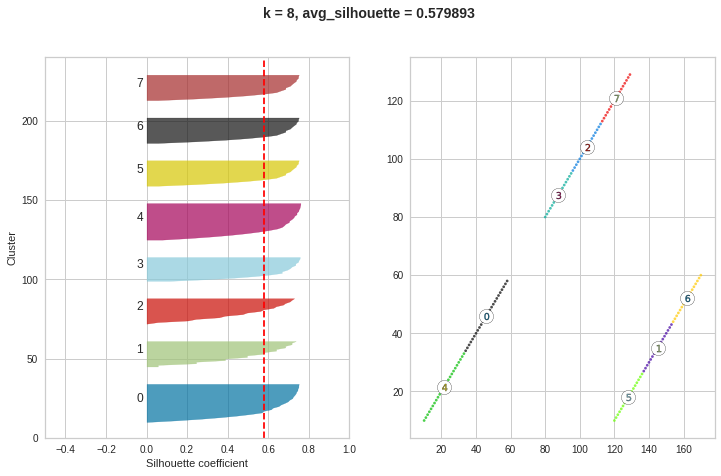

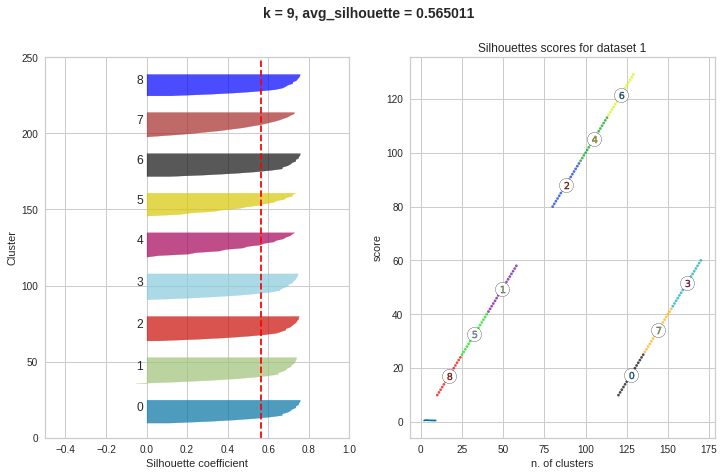

In [ ]:
evaluations = [kmeans_evaluation(data1, k, 10) for k in range(1, 10)]
plt.plot([k for k in range(1,10)], evaluations)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
print(evaluations)
plt.show()

kmeans_silhouette_scores(data1, 10, "1")

Data2

[11537928.019123904, 6012536.807920577, 3327510.8518072404, 2586237.0437564515, 2055431.3380051374, 1660270.3288248011, 1290893.1625678646, 1108481.9309916643, 943408.1154597037]


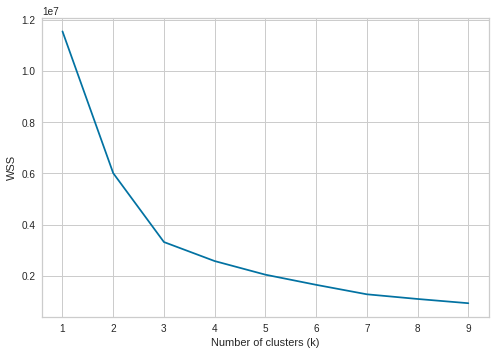

Best k for silhouette:  3


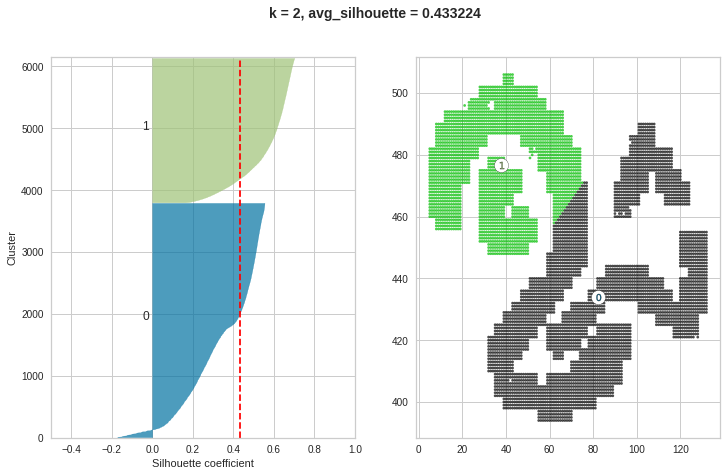

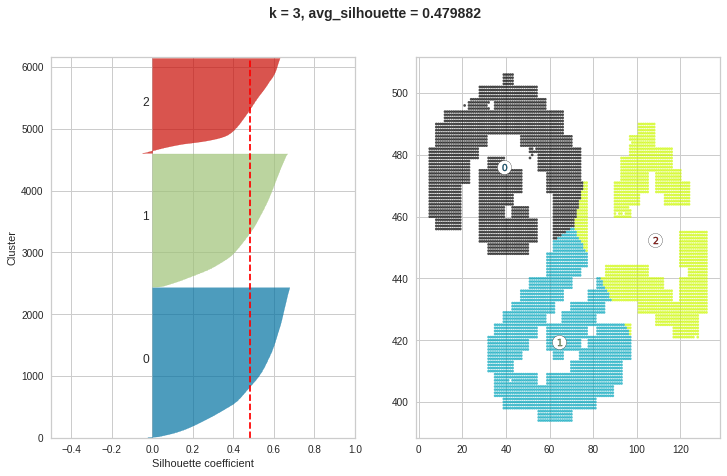

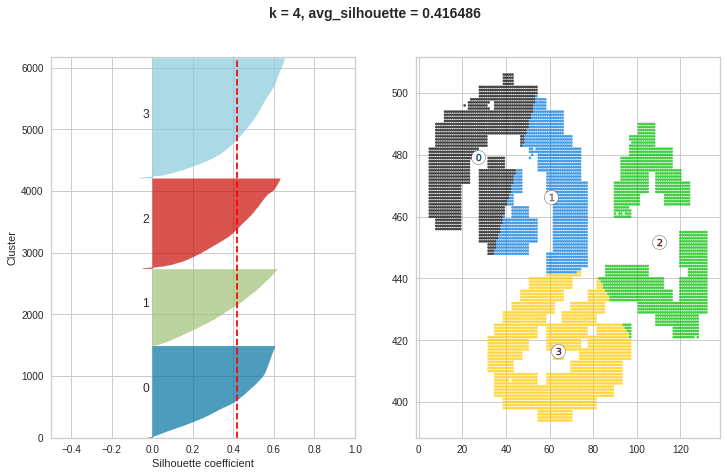

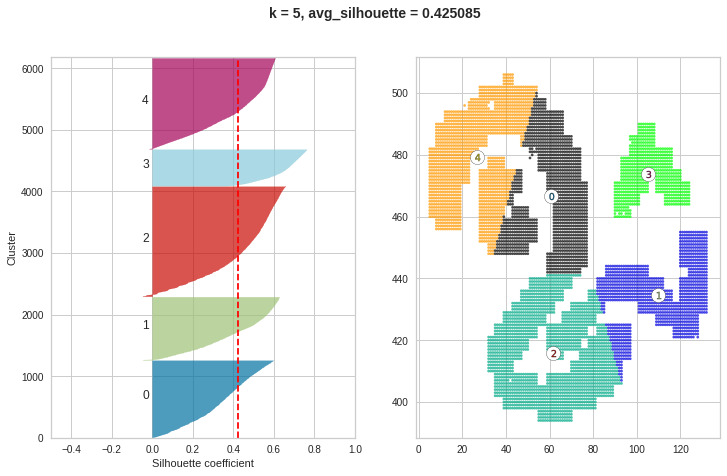

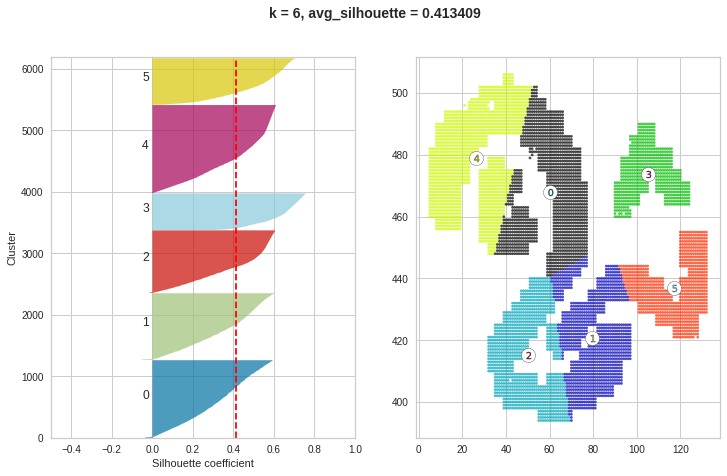

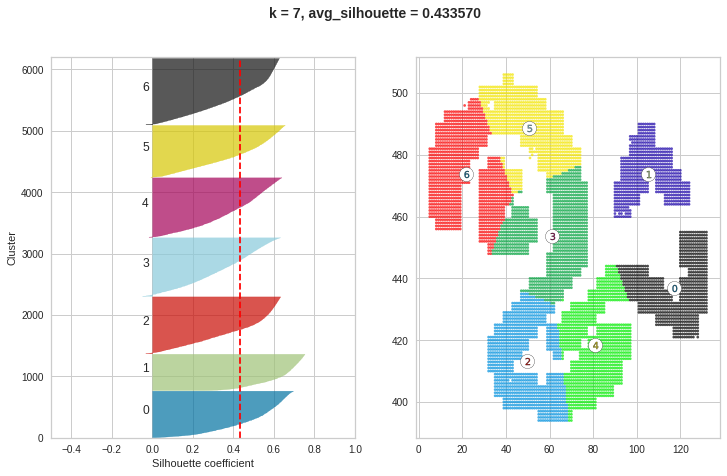

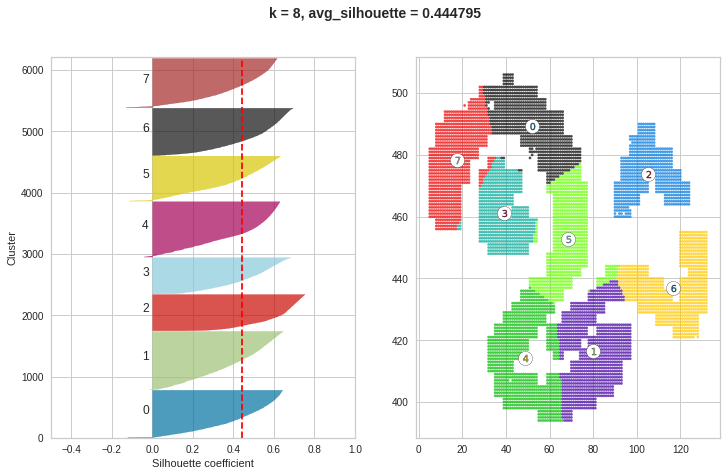

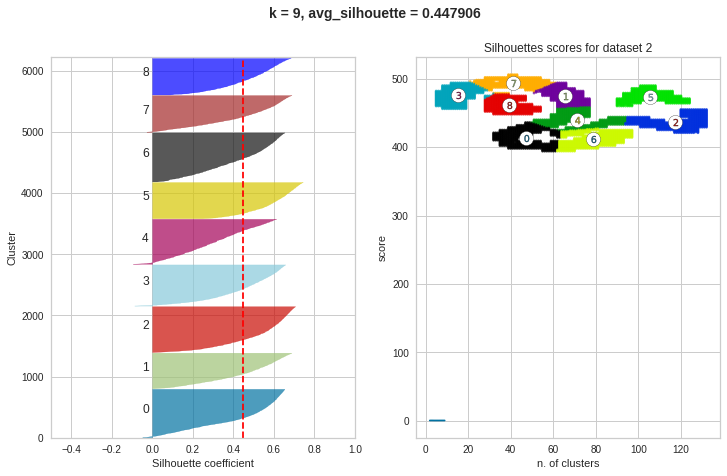

In [ ]:
evaluations = [kmeans_evaluation(data2, k, 10) for k in range(1, 10)]
plt.plot([k for k in range(1,10)], evaluations)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
print(evaluations)
plt.show()

kmeans_silhouette_scores(data2, 10, "2")


Data3

[2418979043.1137404, 1425192732.566758, 916142941.6242799, 632503821.390024, 490041415.82750285, 384236577.1304797, 314179478.64805907, 275280659.78782773, 240354692.2215754]


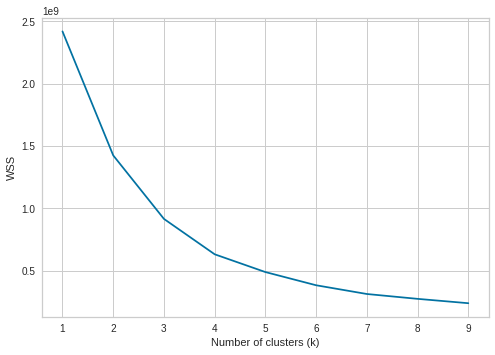

Best k for silhouette:  6


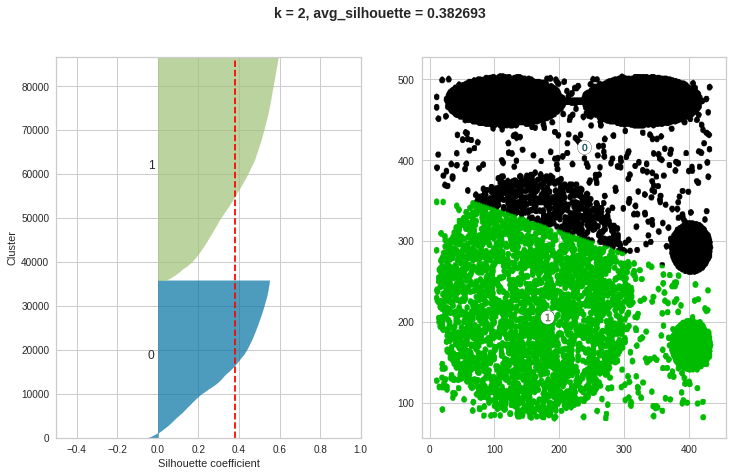

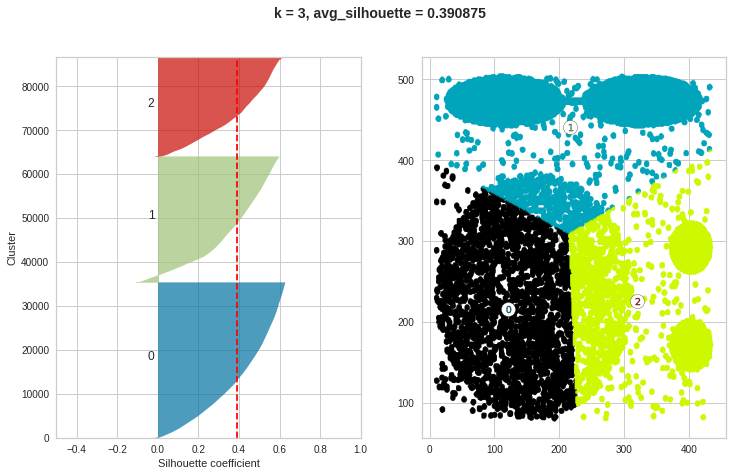

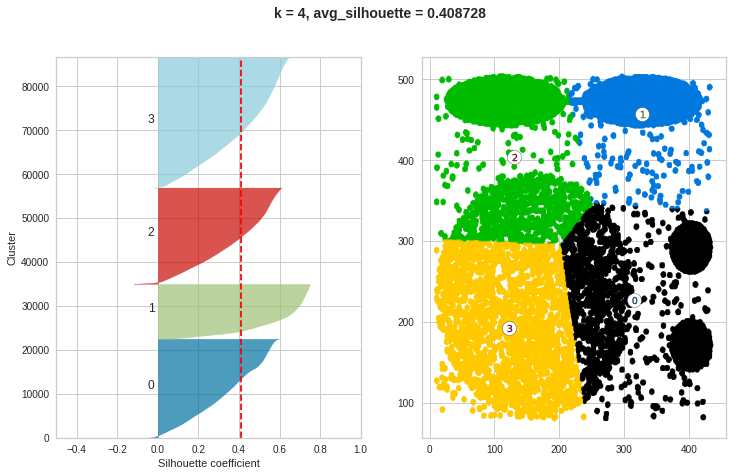

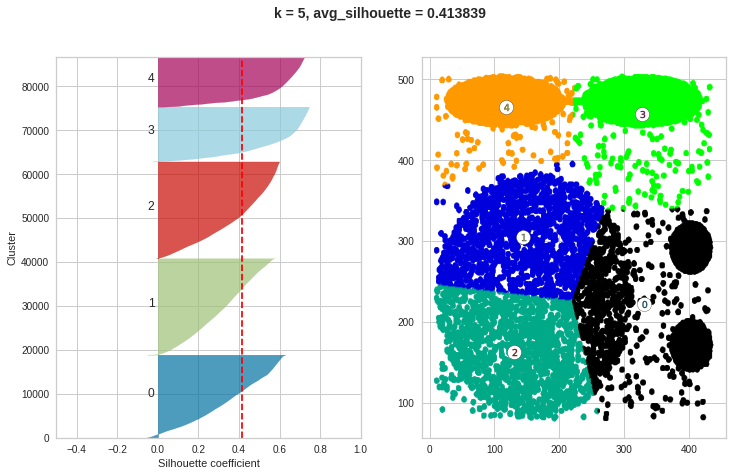

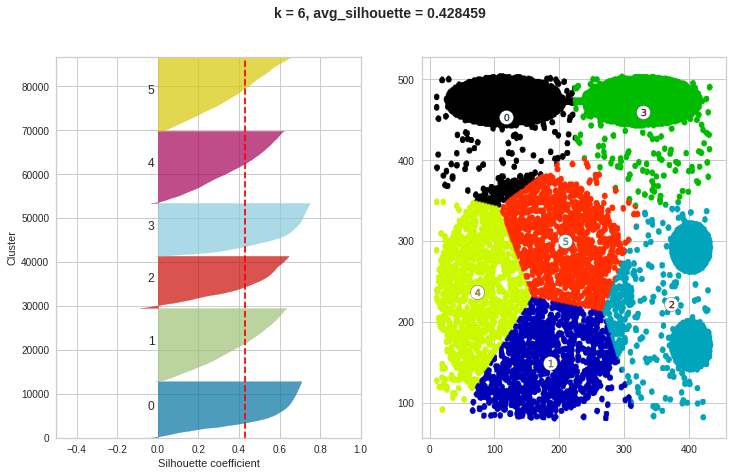

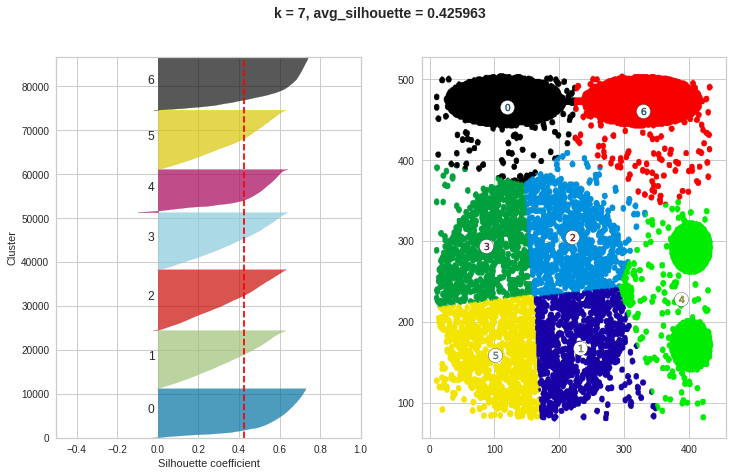

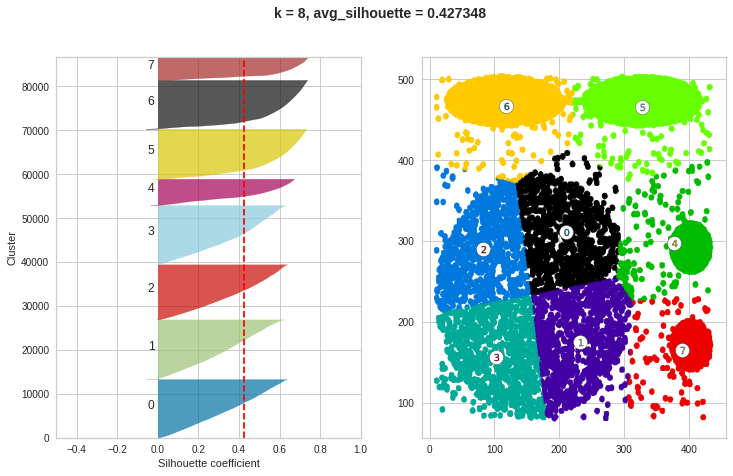

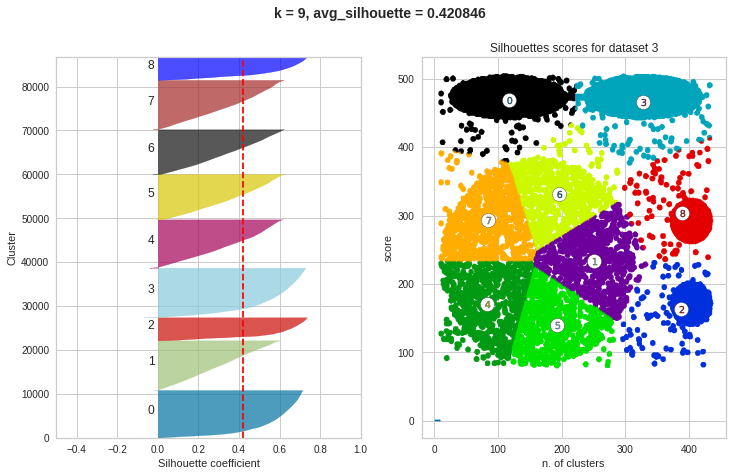

In [ ]:
evaluations = [kmeans_evaluation(data3, k, 1) for k in range(1, 10)]
plt.plot([k for k in range(1,10)], evaluations)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
print(evaluations)
plt.show()

kmeans_silhouette_scores(data3, 10, "3")



In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

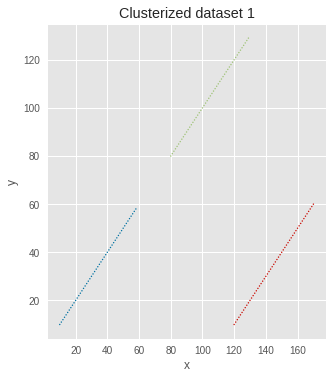

In [ ]:
#PRIMO DATASET
from sklearn.cluster import DBSCAN


dbscan1 = DBSCAN(eps=8, min_samples=10).fit(data1)
plot_clusters(data1, dbscan1, n_samples1, "1")


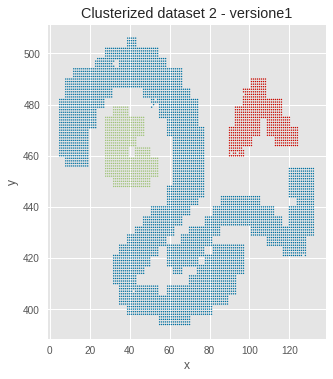

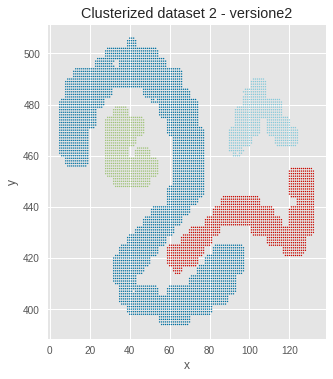

In [ ]:
from sklearn.cluster import DBSCAN

#eps = espilon (distanza massima tra due punti per essere considerati vicini); min_samples = MinPts (numero minimo di vicini per essere considerato CORE POINT)
dbscan2 = DBSCAN(eps=1.5, min_samples=5).fit(data2)
plot_clusters(data2, dbscan2, n_samples2, "2 - versione1")

dbscan2 = DBSCAN(eps=2.2, min_samples=12).fit(data2)
plot_clusters(data2, dbscan2, n_samples2, "2 - versione2")


In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

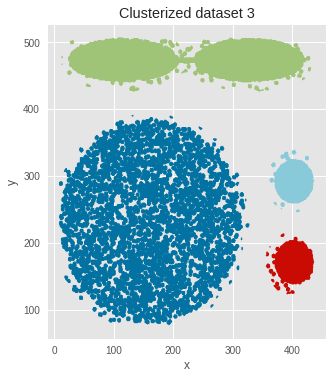

In [ ]:
#TERZO DATASET
from sklearn.cluster import DBSCAN

dbscan3 = DBSCAN(eps=14, min_samples=300).fit(data3)
plot_clusters(data3, dbscan3, n_samples3, "3")

On dataset 3

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [ ]:

# L’idea è che i punti all’interno di un cluster hanno i k vicini più o meno alla stessa distanza. 
# I punti rumorosi invece avranno i k vicini più lontani.
# Quindi calcoliamo la distanza di ogni k-esimo vicino 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def reachability_distance(data, minpts): 
  clf = NearestNeighbors(n_neighbors=minpts) #prende 10 esempi piu vicini da un esempio e calcola la distanza
  clf = clf.fit(data) # memorizziamo semplicemente i datapoint nel modello k-nn
  distances, _ = clf.kneighbors(data) # prendiamo le distanze dei k vicini dal più vicino al più distante

  distances = sorted(distances[:,minpts-1]) # selezioniamo -1 perchè ci interessa solo la distanza dall'ultimo vicino
  
  plt.xlabel("n. of points with such distance")
  plt.ylabel("Distance from "+str(minpts)+"-th neighbor")
  plt.plot(distances)
  plt.show()


SECONDO DATASET

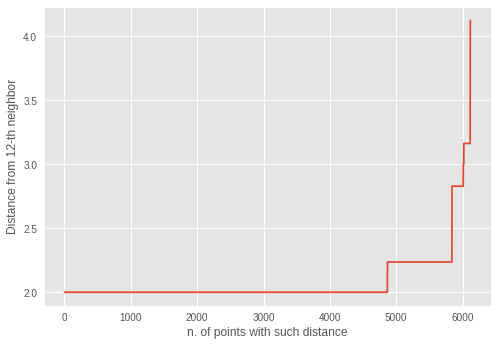

In [ ]:
reachability_distance(data2, minpts=12)

TERZO DATASET

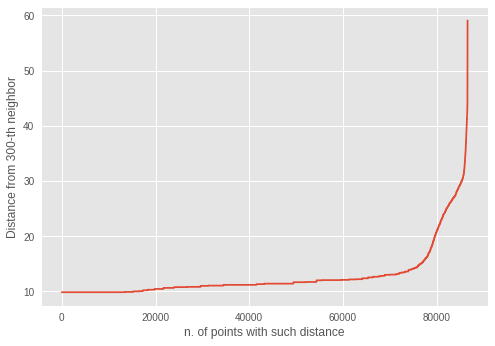

In [ ]:
reachability_distance(data3, minpts=300)